# Law of Large Numbers

#### *The law of large numbers, in probability and statistics, states that as a sample size grows, its mean gets closer to the average (expected value) of the whole population, in other words, as sample size increases, expected value of certain metric converges to expected value of that metric for the whole population*

This python notebook intends to explain law of large number by showing that a random set of numbers pulled from normal distribution convergae to a mean $\mu$ equal to population mean, then it compares distribution of these samples to a normal distribution.

The process is then repeated for dataset with feature that has a distribution that is approximately (but not exactly) a normal distribution.

In [1]:
#import necessary modules, numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
# Set Seaborn style for all plots

sns.set()

In [3]:
%pylab inline
import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


In [4]:
# First sizes of samples is selected to increase from 1 to 10 million, with logarithmic increase
A = np.logspace(0, 7, 15)
D = {}

# For each sample size, random values are picked from normal distribution, 
# then the percentage of values that lie within ±1 std 𝜎 of mean 𝜇
# Any other metric could be used (mean for example)
for i in A:
    B = np.random.randn(int(i))
    C = len(B)
    E = np.mean(B)
    D[C] = E
    #print('Sample Size:', C, 'Values within 1 standard deviation from mean:'"{0:.2%}".format(E))
#print(D)

In [5]:
# Convert the values into dataframe for easier visualization
data = pd.DataFrame.from_dict(D, orient = 'index', columns = ['Sample Mean'])
data.index.rename('No', inplace = True)
#data.style.format({'No': '0:.2%', "% witin 1 \u03C3": "{0:.2f}"})
#data.head()

In [6]:
#pd.options.display.float_format = '{:.1%}'.format
data = pd.DataFrame.from_dict(D, orient = 'index', columns = ['Sample Mean'])
data.index.rename('No of Samples', inplace = True)
data.reset_index(inplace = True)
#data.style.hide_index()
data.style.format({'Sample Mean': '{:.2f}'}).hide_index()
#data

No of Samples,Sample Mean
1,-0.38
3,-0.52
10,0.67
31,-0.17
100,-0.13
316,-0.08
1000,-0.02
3162,-0.01
10000,-0.01
31622,-0.01


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


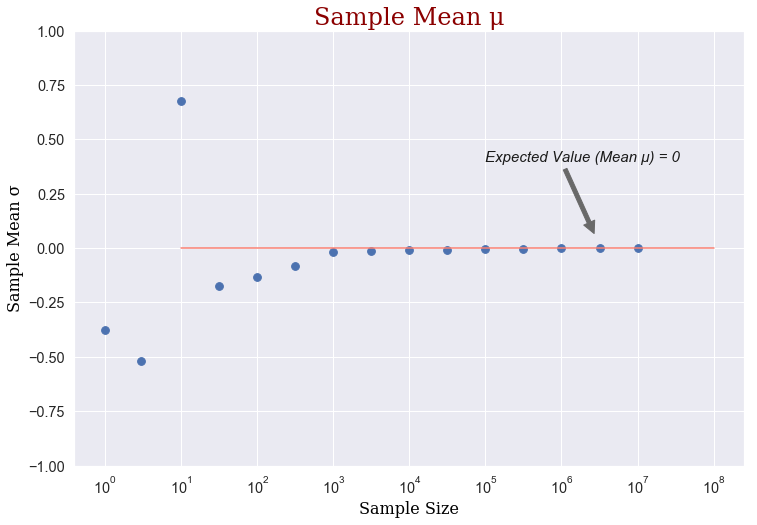

In [7]:
#Plot values for different sample sizes vs. sample size, and watch how they converge to the expected value

#plt.figure(num = 1, figsize = (40, 12))
ax = data.plot(x = 'No of Samples', y = 'Sample Mean', kind = 'scatter',s = 60 ,
               #c= 'darkblue',
               figsize = (12, 8))

#ax.set_size_inches(18.5, 10.5, forward=True)
plt.xscale('log')
font_title = {'family': 'serif',
              'color':  'darkred',
              'weight': 'normal',
              'size': 24,
              }
plt.title('Sample Mean \u03BC', fontdict = font_title)
font_axes = {'family': 'serif',
              'color':  'black',
              'weight': 'normal',
              'size': 16,
              }
plt.xlabel('Sample Size', fontdict = font_axes)
plt.ylabel('Sample Mean \u03C3', fontdict = font_axes)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.Axes.tick_params(ax, labelsize = 'x-large')

hx = [1e1, 1e8]
hy = [0, 0]

plt.plot(hx, hy, color = 'salmon')

ax.annotate('', xy=(3e6, 0.03), xytext=(1e6, 0.4),
            arrowprops=dict(facecolor='dimgray', edgecolor = 'dimgray', shrink=0.1))

ax.text(1e5, 0.4, 'Expected Value (Mean \u03BC) = 0', style='italic', color = 'k', fontsize = 15)

ax.set(ylim = (-1, 1))

plt.show()

### *Plot distributions of above samples, and compare them to normal distribution*

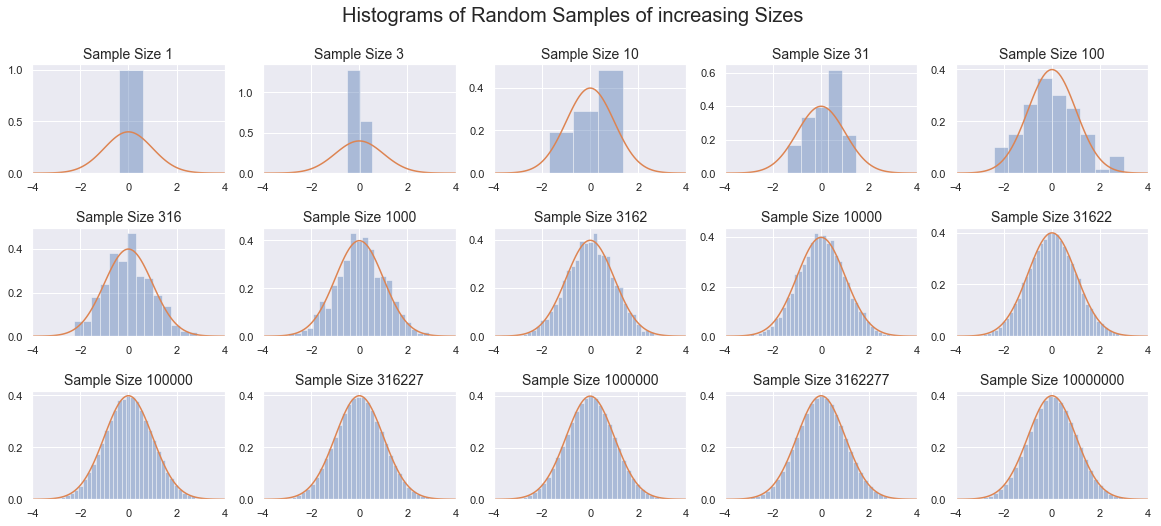

In [8]:
#Plot different distributions in different subplots

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.5) #, wspace = 0.5)
fig.suptitle('Histograms of Random Samples of increasing Sizes', fontsize = 20)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

for ax, i in zip(axes.flatten(), A):
    sns.distplot(np.random.randn(int(i)), ax=ax, kde = False, norm_hist = True)
    ax.plot(x, stats.norm.pdf(x, mu, sigma))
    ax.set(xlim = (-4, 4)) #  xlabel='Density', title='Sample Size %d'%i, 
    ax.set_title('Sample Size %d'%i, size = 14)

**As sample size grow, its distribution comes closer to a normal distribution**

In [9]:
@widgets.interact(i = widgets.FloatLogSlider(min=0, max=7, base = 10, step=0.5, value=100, 
                                             readout_format = 'd', description='Sample Size'))
def LLM(i):
# i: sample size
    figure(figsize=(20,10))
    title('Histogram of random sample of size %d vs. Normal Distribution'%i,fontsize = 20)
    # xlabel('$\overline{X}$',fontsize = 15)
    ylabel('Density', fontsize = 15)
    xlim(-4, 4)
    #grid()
        
        
    W = np.random.randn(int(i))
    sns.distplot(W, kde = False, norm_hist = True)

    plot(x, stats.norm.pdf(x, mu, sigma))

interactive(children=(FloatLogSlider(value=100.0, description='Sample Size', max=7.0, readout_format='d', step…

## *Replicate above experiment on a large dataset, with approximate normal distribution (O3 Mean from US Pollution Data Set)*

In [10]:
# Import dataset into pandas dataframe
pollution_us = pd.read_csv('E:\Datasets\pollution_us_2000_2016.csv')

In [11]:
#Explore columns to view column name to be selected
pollution_us.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [12]:
# Convert the series into a numpy array for calculation spped
O3_mean = np.array(pollution_us['O3 Mean'])
O3_mean.shape

(1746661,)

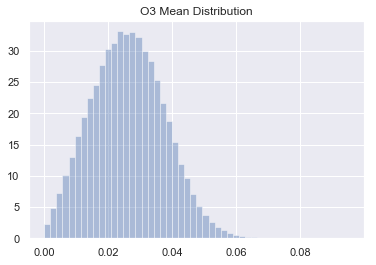

In [13]:
#Plot O3 Mean dataset to view distribution
sns.distplot(O3_mean, kde = False, norm_hist = True)
plt.title('O3 Mean Distribution')
plt.show()

In [14]:
#Calcualte mean and standard deviation of the data set

mean, std = stats.distributions.norm.fit(O3_mean)
mean, std

(0.02612484518747485, 0.011369732129502211)

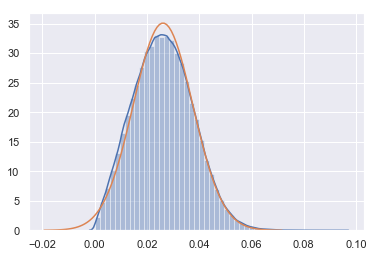

In [15]:
sns.distplot(O3_mean)
x = np.linspace(mean - 4*std, mean + 4*std, 100)
plot(x, stats.norm.pdf(x, mean, std))
plt.show()

#### *O3 mean values do not form an exact normal distribution but a distribution close to normal cut at 0*

In [16]:
# Pull 13 samples of increasing sizes, 1 to 1 million

F = np.logspace(0, 6, 13)
G = {}
for i in F:
    
    H = np.random.choice(O3_mean, int(i), replace = False)
    I = len(H)
    J = np.mean(H)
    G[I] = J
   # print('Sample Size:', I, 'Values within 1 standard deviation from mean:'"{0:.2%}".format(J))
# print(G)

In [17]:
# Convert data to pandas dataframe for easier visualization
O3_data = pd.DataFrame.from_dict(G, orient = 'index', columns = ['Sample Mean'])
O3_data.index.rename('Sample Size', inplace = True)
O3_data.style.format({'No': '0:.2%', "% witin 1 \u03C3": "{0:.2%}"})
O3_data.index.rename('Sample Size', inplace = True)
O3_data.reset_index(inplace = True)
#data.style.hide_index()
O3_data.style.format({'Sample Mean': '{:.4f}'}).hide_index()
#data.head()

Sample Size,Sample Mean
1,0.0303
3,0.0326
10,0.0254
31,0.0267
100,0.0273
316,0.0250
1000,0.0267
3162,0.0258
10000,0.0262
31622,0.0262


### *Taking larger samples of O3 mean dataset will lead that sample mean converges to 0.0261*

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


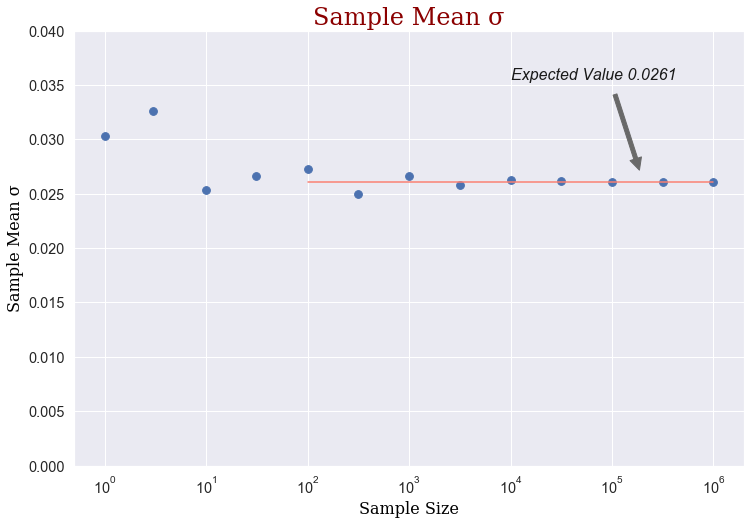

In [18]:
#Plot the data to show how the value converges to population value of 66.5%

ax2 = O3_data.plot(x = 'Sample Size', y = 'Sample Mean', kind = 'scatter',s = 60 ,
               figsize = (12, 8))

#ax.set_size_inches(18.5, 10.5, forward=True)
plt.xscale('log')
font_title = {'family': 'serif',
              'color':  'darkred',
              'weight': 'normal',
              'size': 24,
              }
plt.title('Sample Mean \u03C3', fontdict = font_title)
font_axes = {'family': 'serif',
              'color':  'black',
              'weight': 'normal',
              'size': 16,
              }
plt.xlabel('Sample Size', fontdict = font_axes)
plt.ylabel('Sample Mean \u03C3', fontdict = font_axes)
#ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0, symbol='%', is_latex=False))
plt.Axes.tick_params(ax2, labelsize = 'x-large')

hx = [100, 1e6]
hy = [0.0261, 0.0261]

plt.plot(hx, hy, color = 'salmon')

ylim(0, 0.04)

ax2.annotate('', xy=(2e5, 0.0263), xytext=(1e5, 0.035),
            arrowprops=dict(facecolor='dimgray', edgecolor = 'dimgray', shrink=0.1))

ax2.text(1e4, 0.0355, 'Expected Value 0.0261', style='italic', color = 'k', fontsize = 16)

plt.show()

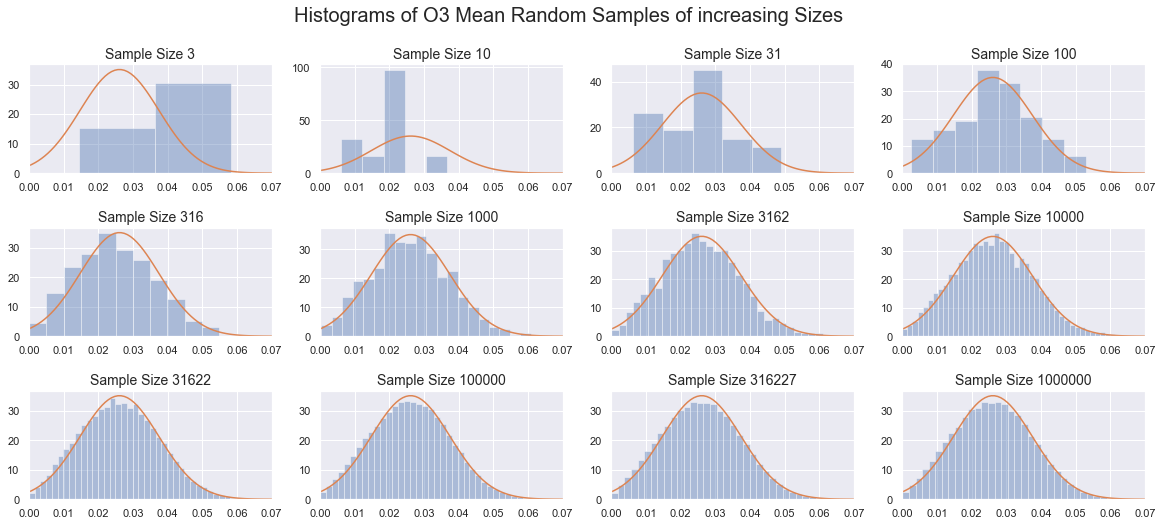

In [19]:
# Plot distributions of different values, and show how they 
# come closer to normal distribution as sample size becomes larger

Z = np.logspace(0.5, 6, 12)
x2 = np.linspace(mean - 4*std, mean + 4*std, 100)
    
fig2, axes2 = plt.subplots(nrows=3, ncols=4, figsize=(20, 8), facecolor='w', edgecolor='k')
fig2.subplots_adjust(hspace=0.5) #, wspace = 0.5)
fig2.suptitle('Histograms of O3 Mean Random Samples of increasing Sizes', fontsize = 20)

for ax, i in zip(axes2.flatten(), Z):
    sns.distplot(np.random.choice(O3_mean, int(i)), ax=ax, kde = False, norm_hist = True)
    ax.plot(x2, stats.norm.pdf(x2, mean, std))
    ax.set(xlim = (0, 0.07)) #  xlabel='Density', title='Sample Size %d'%i, 
    ax.set_title('Sample Size %d'%i, size = 14)

In [20]:
# Plot distributions of different values, and show how they 
# come closer to normal distribution as sample size becomes larger

@widgets.interact(n = widgets.FloatLogSlider(min=0, max=6, base = 10, step=0.5, value=100, 
                                             readout_format = 'd', description='Sample Size'))
def LLM1(n):
# n: sample size
    figure(figsize=(20,10))
    title('Histogram of random sample of size %d vs. Normal Distribution'%n,fontsize = 20)
    xlabel('$\overline{X}$',fontsize = 15)
    ylabel('Frequency', fontsize = 15)
    #grid()
        
        
    W = np.random.choice(O3_mean, int(n))
    sns.distplot(W, kde = False, norm_hist = True)
    mu = mean
    sigma = std
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    plot(x, stats.norm.pdf(x, mu, sigma))

interactive(children=(FloatLogSlider(value=100.0, description='Sample Size', max=6.0, readout_format='d', step…

## <span style="color:dimgray"> **Above graphs show that for both random sample chosen from normal distribution or random sample chosen from normally distributed set, as sample size increases, expected value of certain metric converges to expected value of the population, and sample histogram shape converges to normal distribution** </span>